# **Political Violence in the G5 Sahel Countries (2018-2023)**

**An Application of ACLED’s Conflict Index Methodology**

```bash
Author : Aboubacar HEMA
Supervision : Wim MARIVOET
Contact : a.hema@cgiar.org / w.marivoet@cgiar.org
Role : Research Analyst at IFPRI
Year : 2023
```

-----------------
## **Objective**
-----------------

- To compute the **conflict diffusion indicator** per adm2/year by using ACLED’s Conflict Index Methodology , comprising the following steps: 
1. Create a spatial grid of 10km-by-10km 
2. Remove grid cells with less than 100 habitants using population data from WorldPop (pop_country)
3. Identify grid cells with at least 10 conflict events per year using events_diffusion layer
4. Compute the proportion of high violence grid cells to total cells per adm2/year


-----------------
## **Output**
-----------------

- [Political violence in the G5 Sahel Countries (2018-2023): An application of ACLED’s conflict index methodology](https://cgspace.cgiar.org/items/1d0dd9f6-e3b6-4be2-bc08-bd9a7171ee69) 

- [ACLED Conflict Index G5 Sahel (2018-2023)](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T6UT9O)


-----------------
## **Dataset**
-----------------

* ``pop_sahel`` [Constrained individual countries 2020 UN adjusted (100-meter resolution)](https://www.worldpop.org/) datasets for Mauritania, Mali, Burkina Faso, Niger, and Chad. Given the midpoint reference of 2020, it is assumed that any demographic change between 2018 and 2023 will have only a minor effect on the estimated diffusion indicator
* ``sahel_adm2`` [UNOCHA Geographic dataset for Sahel (Administrative boundaries and settlements)](https://data.humdata.org/dataset/sahel-administrative-boundaries)
* ``events_diffusion`` 	[ACLED Curated dataset for Africa (5 January 2024)](https://acleddata.com/data-export-tool/)
* ``geometry`` the time stamp for drop-off


From ACLED site:

* ``Indicator`` Diffusion
* ``Measure`` What proportion of the country experiences a high level of violence?
* ``Significance`` Many conflicts can occur in a country simultaneously, adding to the geographic spread of conflict across states. This measure is an assessment of the geographic distribution of conflict. Each country is divided into a 10km-by-10km spatial grid. Grid cells that have a population of fewer than 100 people are excluded. Next, ACLED determines how many of a country’s geographic grid cells experience a high level of violence, defined as at least 10 events per year (representing the top 10% of cases).
* ``The Diffusion indicator represents the proportion of high violence grid cells to total cells (i.e. the percentage of geographic area experiencing high levels of violence)`` 

-----------------
## **Technical requirements**
-----------------


```bash
conda create -n gee python
conda activate gee
conda install -c conda-forge mamba
mamba install -c conda-forge pygis
pip install geemap
pip install ee
```

-----------------
## **Import the necessary libraries**
-----------------

-----------------
## **Import the necessary libraries**
-----------------


In [2]:

import ee
import geemap

# Basic libraries of python for numeric and dataframe computations
import numpy as np                              
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt 

# Slightly advanced library for data visualization            
import seaborn as sns   

In [3]:
# Authenticate and Initialize Earth Engine
geemap.ee_initialize()

Enter verification code: 4/1AeaYSHAZPK8B05kbCymI_mM88U6Z6gvRk2nBl6XA81fmlGpv2piBw0DmAOc

Successfully saved authorization token.


-----------------
## **Load data**
-----------------

In [4]:
#WorldPop = ee.ImageCollection("WorldPop/GP/100m/pop")
pop_sahel = ee.Image("projects/ee-aboubacarhema94/assets/ACLED/Sahel_pop_2020_UNadj_constrained")
sahel_adm2 = ee.FeatureCollection("projects/ee-aboubacarhema94/assets/ACLED/G5_Sahel_adm2")
events_diffusion = ee.FeatureCollection("projects/ee-aboubacarhema94/assets/ACLED/G5_Sahel_Diffusion")
geometry = ee.Geometry.Polygon(
        [[[-19.7019400534855, 29.93665627910383],
          [-19.7019400534855, 5.813630636937255],
          [26.967981821514496, 5.813630636937255],
          [26.967981821514496, 29.93665627910383]]])

In [5]:
# Extract the projection before doing any computation
projection = pop_sahel.projection()
projection.getInfo()

{'type': 'Projection',
 'crs': 'EPSG:4326',
 'transform': [0.000833333330003155,
  0,
  -17.06624991685372,
  0,
  -0.0008333333300088002,
  27.297916759268993]}

In [6]:
# Native Resolution:
projection.nominalScale()

In [7]:
pop_sahel_stats = geemap.image_stats(pop_sahel, scale=100)
pop_sahel_stats.getInfo()

{'max': {'b1': 4269.693359375},
 'mean': {'b1': 13.01768505881743},
 'min': {'b1': 0},
 'std': {'b1': 20.775038775581844},
 'sum': {'b1': 74382024.02896315}}

In [ ]:
'''
pop_sahel_stats = 'pop_sahel_stats.csv'
geemap.zonal_stats(
    pop_sahel,
    sahel_adm2,
    pop_sahel_stats,
    statistics_type='SUM',
    scale=100, 
    return_fc=False
)
'''

In [9]:
#Initialize a Map
Map = geemap.Map()
Map.centerObject(sahel_adm2)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [10]:
# Set visualization/style parameters
sahel_adm2_style = {
    "fillColor": "00000000", # transparent color code
    "color": "black", # color of the stroke
    "width": 0.5 # stroke width
}

# Display the layer
Map.addLayer(sahel_adm2.style(**sahel_adm2_style), {}, " G5 Sahel Administrative two Boundaries")
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [11]:
# To preview first five rows. 
def preview(df, n=5):
    """return n rows that have fewest number of nulls"""
    order = df.isnull().sum(axis=1).sort_values().head(n).index
    return df.loc[order]

# View the Datasets
df_sahel_adm2 = geemap.ee_to_df(sahel_adm2, sort_columns=True)

preview(df_sahel_adm2, 10)

,OBJECTID,Shape_Area,Shape_Le_1,Shape_Leng,admin0Name,admin0Pcod,admin1Name,admin1Pcod,admin2Name,admin2Pcod
0,1516,0.238447,2.981459,2.981459,Burkina Faso,BF,Centre,BF13,Kadiogo,BF1300
194,2010,0.116923,1.679108,1.679108,Niger,NE,Tillabéri,NE06,Balleyara,NE0603
193,2008,0.255135,2.578268,2.578268,Niger,NE,Tillabéri,NE06,Ayerou,NE0602
192,2003,1.041300,5.377827,5.378735,Niger,NE,Tillabéri,NE06,Abala,NE0601
191,2068,0.063368,0.992387,0.992387,Niger,NE,Tahoua,NE05,Ville de Tahoua,NE0513
190,2066,1.487823,5.187640,5.187640,Niger,NE,Tahoua,NE05,Tillia,NE0512
189,2059,0.926053,5.056305,5.056305,Niger,NE,Tahoua,NE05,Tchintabaraden,NE0511
195,2011,0.542171,3.585039,3.585039,Niger,NE,Tillabéri,NE06,Banibangou,NE0604
188,2058,2.498677,8.031381,8.031530,Niger,NE,Tahoua,NE05,Tassara,NE0510
186,2046,0.121863,1.680674,1.680674,Niger,NE,Tahoua,NE05,Malbaza,NE0508


In [12]:
#Let's check the first five rows of the data
df_sahel_adm2.head()

,OBJECTID,Shape_Area,Shape_Le_1,Shape_Leng,admin0Name,admin0Pcod,admin1Name,admin1Pcod,admin2Name,admin2Pcod
0,1516,0.238447,2.981459,2.981459,Burkina Faso,BF,Centre,BF13,Kadiogo,BF1300
1,1417,0.376722,4.830069,4.830069,Burkina Faso,BF,Boucle du Mouhoun,BF46,Bale,BF4601
2,1527,0.490583,5.015746,5.015746,Burkina Faso,BF,Boucle du Mouhoun,BF46,Banwa,BF4602
3,1530,0.571324,5.523416,5.523416,Burkina Faso,BF,Boucle du Mouhoun,BF46,Mouhoun,BF4604
4,1559,0.309684,2.757532,2.757532,Burkina Faso,BF,Boucle du Mouhoun,BF46,Nayala,BF4605


Let's check the **info** of the data

In [13]:
# Checking the info of the dataset
df_sahel_adm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    287 non-null    int64  
 1   Shape_Area  287 non-null    float64
 2   Shape_Le_1  287 non-null    float64
 3   Shape_Leng  287 non-null    float64
 4   admin0Name  287 non-null    object 
 5   admin0Pcod  287 non-null    object 
 6   admin1Name  287 non-null    object 
 7   admin1Pcod  287 non-null    object 
 8   admin2Name  287 non-null    object 
 9   admin2Pcod  287 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 22.6+ KB


- There are 287 non null values in the dataset.

<Axes: xlabel='admin0Pcod'>

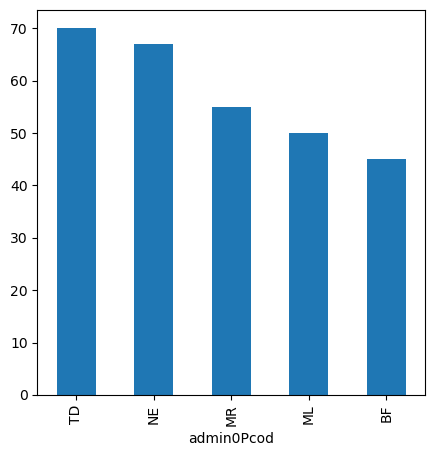

In [14]:
# Plotting countplot for admin0Pcod (G5 Sahel Countries)
df_sahel_adm2.admin0Pcod.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(5,5))

In [15]:
# Plotting countplot for admin2Pcod (G5 Sahel Countries)
#df_sahel_adm2.admin2Pcod.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(20,8))
# 
df_sahel_adm2.admin0Pcod.value_counts()

admin0Pcod
TD    70
NE    67
MR    55
ML    50
BF    45
Name: count, dtype: int64

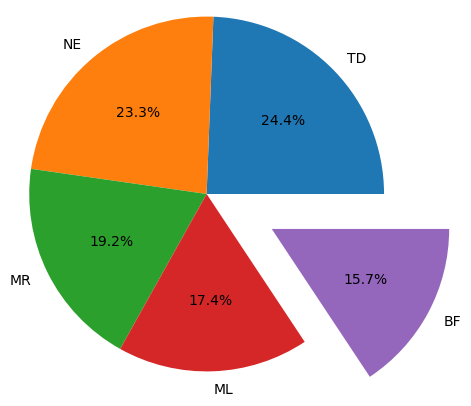

In [16]:
# plot the occurrence of different days in the dataset

# 'autopct' displays the percentage upto 1 decimal place
# 'radius' sets the radius of the pie plot
plt.pie(df_sahel_adm2.admin0Pcod.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['TD', 'NE','MR','ML', 'BF'],
        explode = [0,0,0,0,0.5])

# display the plot
plt.show()

In [17]:
df_events_diffusion = geemap.ee_to_df(events_diffusion, sort_columns=True)
#Let's check the first five rows of the data
df_events_diffusion.head()

,actor1,actor2,admin0Name,admin0Pcod,admin1,admin1Name,admin1Pcod,admin2,admin2Na_1,admin2Name,...,longitude,notes,region,source,source_sca,sub_event_,tags,time_preci,timestamp,year
0,JNIM: Group for Support of Islam and Muslims,Military Forces of Burkina Faso (2015-2022),Burkina Faso,BF,Centre,Centre,BF13,Kadiogo,Kadiogo,Kadiogo,...,-1.525,High-profile attack in Ouagadougou simultaneou...,Western Africa,AFP; Africa News,International,Armed clash,,1,1675727770,2018
1,JNIM: Group for Support of Islam and Muslims,Police Forces of Burkina Faso (2022-),Burkina Faso,BF,Boucle du Mouhoun,Boucle du Mouhoun,BF46,Banwa,Banwa,Banwa,...,-4.338,"On 26 August 2022, presumed JNIM militants ble...",Western Africa,AIB (Burkina Faso); Facebook; Radio Omega; Sah...,New media-National,Remote explosive/landmine/IED,,1,1702343220,2022
2,JNIM: Group for Support of Islam and Muslims,Police Forces of Burkina Faso (2022-),Burkina Faso,BF,Boucle du Mouhoun,Boucle du Mouhoun,BF46,Banwa,Banwa,Banwa,...,-4.090,"On 22 April 2022, presumed JNIM militants simu...",Western Africa,AIB (Burkina Faso); Le Faso; Sahel Security Al...,New media-National,Armed clash,,1,1702343240,2022
3,JNIM: Group for Support of Islam and Muslims,Police Forces of Burkina Faso (2022-) Gendarmerie,Burkina Faso,BF,Boucle du Mouhoun,Boucle du Mouhoun,BF46,Banwa,Banwa,Banwa,...,-4.090,"On 11 August 2022, presumed JNIM militants att...",Western Africa,AIB (Burkina Faso); Sahel Security Alerts; Und...,Local partner-Other,Armed clash,,1,1702343230,2022
4,JNIM: Group for Support of Islam and Muslims,Police Forces of Burkina Faso (2022-),Burkina Faso,BF,Boucle du Mouhoun,Boucle du Mouhoun,BF46,Banwa,Banwa,Banwa,...,-4.156,"On 13 April 2022, presumed JNIM militants atta...",Western Africa,AIB (Burkina Faso); Infowakat; MinuteBf; Undis...,Local partner-Other,Armed clash,,1,1702343240,2022


In [18]:
# Checking the info of the dataset
df_events_diffusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15237 entries, 0 to 15236
Data columns (total 40 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   actor1      15237 non-null  object 
 1   actor2      15237 non-null  object 
 2   admin0Name  15237 non-null  object 
 3   admin0Pcod  15237 non-null  object 
 4   admin1      15237 non-null  object 
 5   admin1Name  15237 non-null  object 
 6   admin1Pcod  15237 non-null  object 
 7   admin2      15237 non-null  object 
 8   admin2Na_1  15237 non-null  object 
 9   admin2Name  15237 non-null  object 
 10  admin2Pc_1  15237 non-null  object 
 11  admin2Pcod  15237 non-null  object 
 12  admin3      15237 non-null  object 
 13  assoc_ac_1  15237 non-null  object 
 14  assoc_acto  15237 non-null  object 
 15  civilian_t  15237 non-null  object 
 16  country     15237 non-null  object 
 17  disorder_t  15237 non-null  object 
 18  event_date  15237 non-null  int64  
 19  event_id_c  15237 non-nul

<Axes: xlabel='admin0Pcod'>

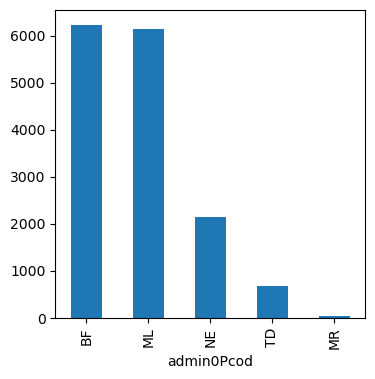

In [19]:
# Plotting countplot for admin0Pcod (G5 Sahel Countries)
df_events_diffusion.admin0Pcod.value_counts().sort_values(ascending=False).plot(kind='bar' ,figsize=(4,4))

In [20]:
df_events_diffusion.admin0Pcod.value_counts()

admin0Pcod
BF    6233
ML    6149
NE    2141
TD     673
MR      41
Name: count, dtype: int64

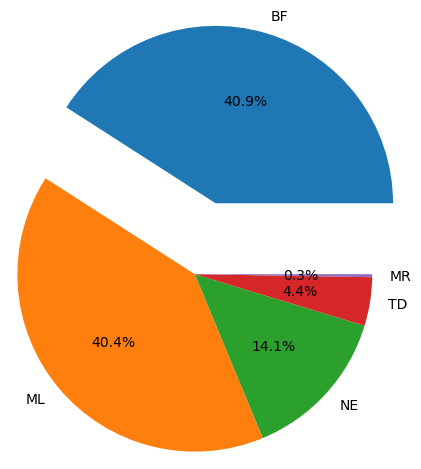

In [21]:
plt.pie(df_events_diffusion.admin0Pcod.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = ['BF', 'ML','NE','TD', 'MR'],
        explode = [0.5,0,0,0,0])

# display the plot
plt.show()

In [22]:
# Use style() to visualize the points
eventsStyled = {
    'color': 'red',
    'pointSize': 1,
    'pointShape': 'triangle',
    'width': 1,
}

Map.addLayer(events_diffusion.style(**eventsStyled), {}, "conflict events from 2018 to 2023")
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [23]:
# Add Population Sahel layer
viz_pop = { # Set visualization parameters
  'min': 0.0,
  'max': 4270.0,
  'palette': ['24126c', '1fff4f', 'd4ff50'],
}
Map.addLayer(pop_sahel,viz_pop,'Population Sahel', True, 1)

Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [25]:
events = events_diffusion.aggregate_count('event_type')
events.getInfo()

15237

-----------------
## **Start conflict diffusion indicator computation**
-----------------

-----------------
### **Set parameters**
-----------------

In [27]:
# year of event
year = 2018

# 
distance = 5000 # in meters

-----------------
#### **Number of Conflict events for the specific year**
-----------------

In [28]:
events_diffusion_year = events_diffusion.filter(ee.Filter.eq('year', year))
events = events_diffusion_year.aggregate_count('event_type')
events.getInfo()

990

In [32]:
#Initialize a Map
Map = geemap.Map()
Map.centerObject(sahel_adm2)
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [33]:
Map.addLayer(events_diffusion_year.style(**eventsStyled), {}, "conflict events for the specific year")
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [34]:
Map.addLayer(pop_sahel,viz_pop,'Population Sahel', True, 1)

Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

In [35]:
featureColl_to_geometry = events_diffusion_year.geometry()
buff = featureColl_to_geometry.buffer(distance)
Map.addLayer(buff, {'color': 'purple'}, 'within 5km of a political violence event', 1)
Map

Map(bottom=3995.0, center=[17.369569793340958, 3.4630404598133353], controls=(WidgetControl(options=['position…

population exposed count at 100 m

In [ ]:
stats = pop_sahel.reduceRegion(**{
  'reducer': ee.Reducer.sum().unweighted(),
  'geometry': buff,
  'scale': projection.nominalScale(),
  'maxPixels': 1e20})




In [54]:
stats.getInfo()

{'b1': 8083961.459938973}

In [44]:
exposedpop_sahel = pop_sahel.clip(buff)
pop_sahel = pop_sahel.rename('inhabitants_100m')
exposedpop_sahel = exposedpop_sahel.rename('exposedpop_sahel')
pop = country_pop.addBands(exposedpop_sahel)

In [46]:
#Create a function to calculate the feature class with ADM2 Name

def calculateFeatureSum(feature):
    events = pop.reduceRegion(**{
    'reducer': ee.Reducer.sum().unweighted(),
    'geometry': feature.geometry().buffer(10),
    'scale': projection.nominalScale(),
    'maxPixels': 1e20
    })
    adm_level = feature.get('admin2Pcod')
    return ee.Feature(
      feature.geometry(),
      events.set('admin2Pcod', adm_level))

In [47]:
Feature_byADM2 = sahel_adm2.map(calculateFeatureSum)

In [48]:
df_Feature_byADM2 = geemap.ee_to_df(Feature_byADM2, sort_columns=True)
df_Feature_byADM2.head()

,admin2Pcod,exposedpop_sahel,inhabitants_100m
0,BF1300,1.897766e+06,3.862966e+06
1,BF4601,1.003860e+04,2.771039e+05
2,BF4602,0.000000e+00,3.389134e+05
3,BF4604,4.145557e+03,3.785539e+05
4,BF4605,0.000000e+00,1.920200e+05


In [49]:
# Checking the info of the dataset
df_Feature_byADM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin2Pcod        287 non-null    object 
 1   exposedpop_sahel  287 non-null    float64
 2   inhabitants_100m  287 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.9+ KB


In [50]:
def indicator(feature):
  #
  val = ee.Number(feature.get('exposedpop_sahel')).divide(ee.Number(feature.get('inhabitants_100m')))
  return feature.set('conflict_diffusion_indicator', val)

Feature_byADM2 = Feature_byADM2.map(indicator)

In [51]:
df_indicator_Feature_byADM2 = geemap.ee_to_df(Feature_byADM2, sort_columns=True)
df_indicator_Feature_byADM2.head()

,admin2Pcod,conflict_diffusion_indicator,exposedpop_sahel,inhabitants_100m
0,BF1300,0.491272,1.897766e+06,3.862966e+06
1,BF4601,0.036227,1.003860e+04,2.771039e+05
2,BF4602,0.000000,0.000000e+00,3.389134e+05
3,BF4604,0.010951,4.145557e+03,3.785539e+05
4,BF4605,0.000000,0.000000e+00,1.920200e+05


In [52]:
# Checking the info of the dataset
df_indicator_Feature_byADM2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   admin2Pcod                    287 non-null    object 
 1   conflict_diffusion_indicator  287 non-null    float64
 2   exposedpop_sahel              287 non-null    float64
 3   inhabitants_100m              287 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.1+ KB


In [53]:
geemap.ee_to_csv(Feature_byADM2, filename='exposed_indicator.csv')

In [43]:
snippet = """
var clippop_sahel = pop_sahel.clip(buff);
"""

geemap.js_snippet_to_py(snippet, add_new_cell=True, import_ee=False)